In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
font_family = 'DejaVu Sans'
title_font = fm.FontProperties(family=font_family, style='normal', size=20, weight='normal', stretch='normal')

In [3]:
save_folder = 'images2'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [4]:
# Definimos el sistema inicial (es decir x, y, z posiciones en el espacio)
initial_state = [0.1, 0, 0]

# Define los parametros del sisetma: sigma, rho, and beta sigma = 10, beta = 8/3 and rho = 99.96
sigma = 10.
rho   = 99.96
beta  = 8./3.

# Definimos los puntos para cual resolveremos el sistema, espaciados de una manera uniforme
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

In [5]:
# Definimos el sistema de Lorents
def lorenz_system(current_state, t):
    
    # Posiciones actuales de x, y, z 
    x, y, z = current_state
    
    # Definimos las tres ecuciones
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    return [dx_dt, dy_dt, dz_dt]

In [6]:
#Se usa la funcion odeint para resolver el sistema
xyz = odeint(lorenz_system, initial_state, time_points)

# Extraemos la solución 
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

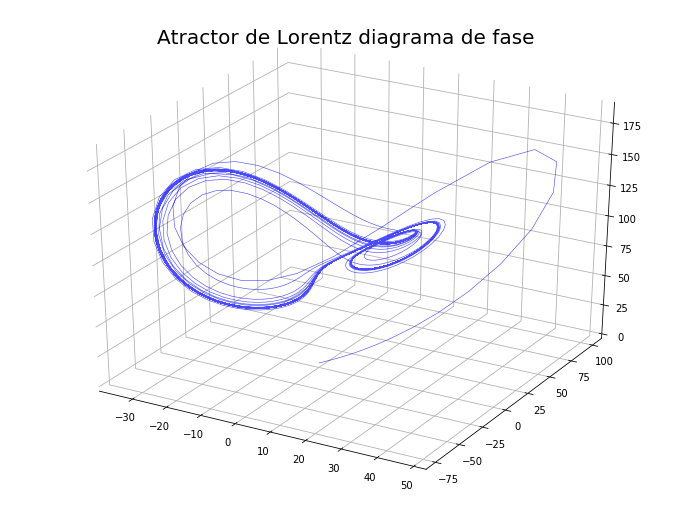

In [7]:
# Graficamos el retrato de fase 
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='blue', alpha=0.7, linewidth=0.6)
ax.set_title('Atractor de Lorentz diagrama de fase', fontproperties=title_font)

fig.savefig('{}/AtractorLorentz3D3.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

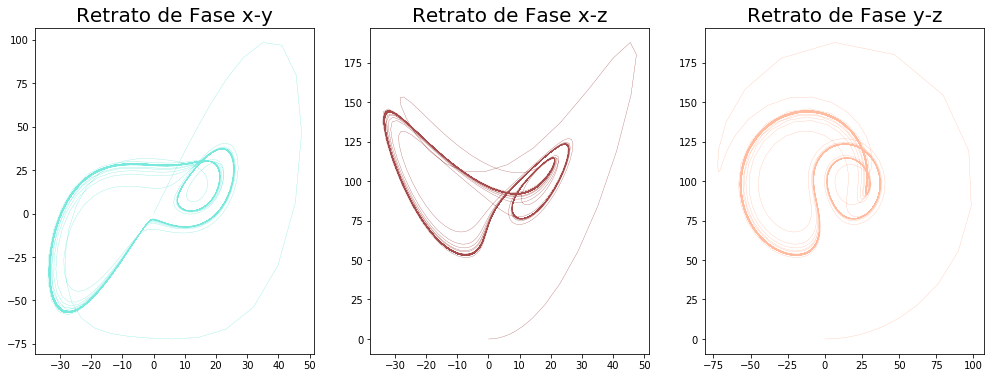

In [8]:
# Graficamos la fase para distintos planos
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(17, 6))

# Graficamos x y y
ax[0].plot(x, y, color='turquoise', alpha=0.7, linewidth=0.3)
ax[0].set_title('Retrato de Fase x-y', fontproperties=title_font)

# Graficamos x y z
ax[1].plot(x, z, color='maroon', alpha=0.7, linewidth=0.3)
ax[1].set_title('Retrato de Fase x-z', fontproperties=title_font)

# Graficamos y y z
ax[2].plot(y, z, color='lightsalmon', alpha=0.7, linewidth=0.3)
ax[2].set_title('Retrato de Fase y-z', fontproperties=title_font)

fig.savefig('{}/AtractorLorentzFase3.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

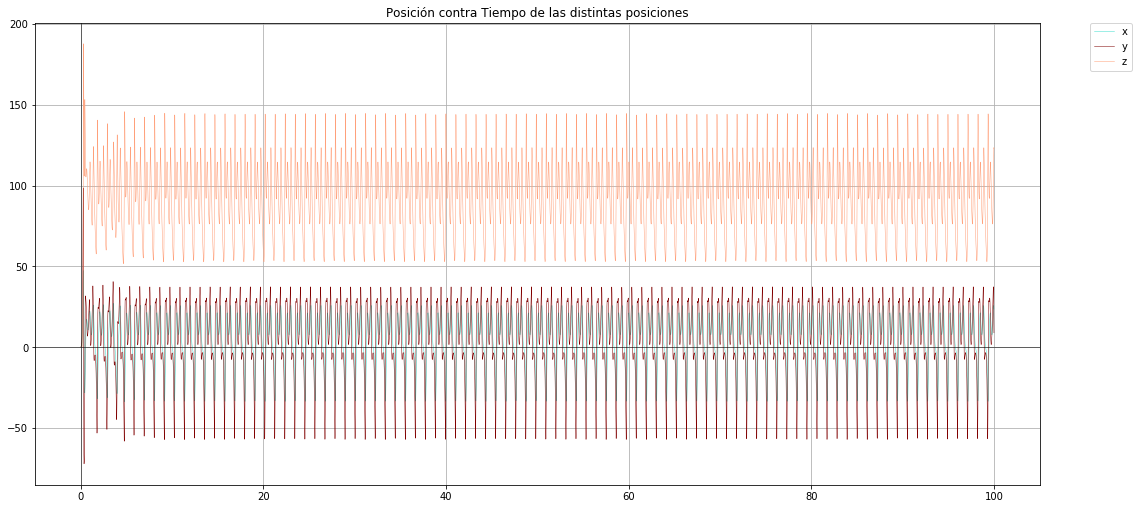

In [9]:
# Graficamos la posición contra tiempo
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import pylab as p


figure(1, figsize=(18, 8.5))

lw=0.5

plot(time_points, x, 'turquoise', linewidth=lw,label="x")
plot(time_points, y, 'maroon', linewidth=lw,label="y")
plot(time_points, z, 'lightsalmon', linewidth=lw,label="z")

grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Posición contra Tiempo de las distintas posiciones')
savefig('{}/AtractorLorentzPosicion3.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()